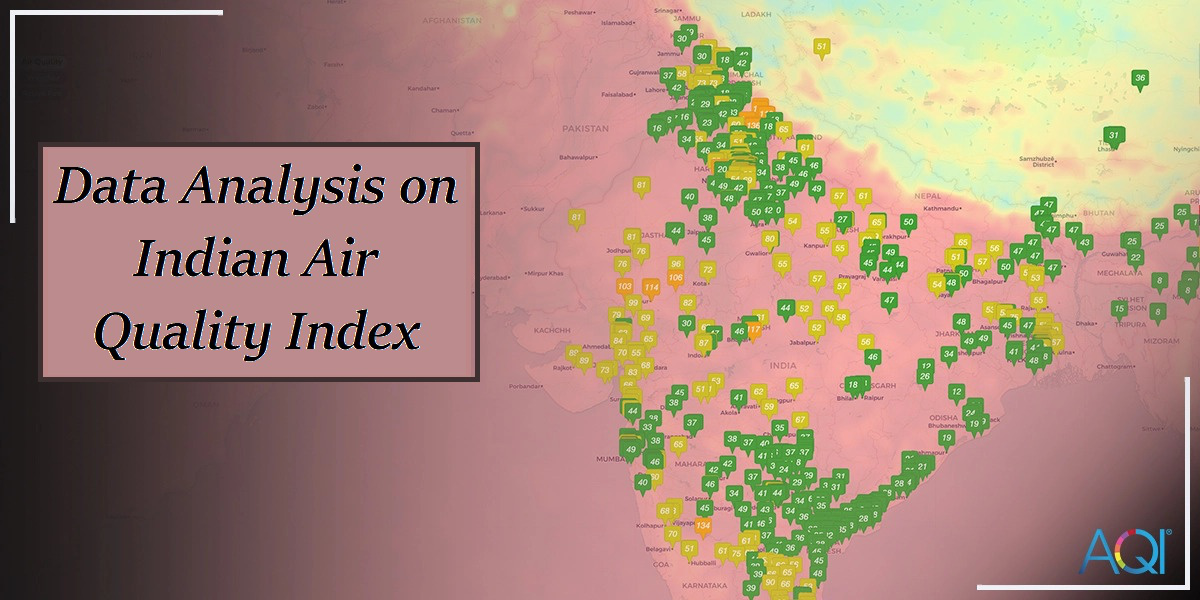

In [75]:
from PIL import Image
img = Image.open("1.jpg")
img

# Analysis and Prediction on Air Quality of India
Demonstrated by **Biswarup Das**

## What is the Air Quality Index (AQI)? 
**Air Quality Index (AQI) is a number used to convey the quality of air by the government to the general public. Air quality deteriorates with an increase in the concentration of pollutants. The Air Quality Index represents the severity of pollution for ordinary people.**

## Importing Necessary Libraries
**Taking analysis specific libraries for data visualization, machine learning model.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

# 1. Getting the Data

**Dataset Link:**https://docs.google.com/spreadsheets/d/1yt2OLxjL81UEpOYyPaDnszQGGXYY5hNowhb4u4rQa_I/edit?usp=share_link

In [ ]:
india=pd.read_csv('data.csv',encoding='unicode_escape')
pd.set_option('display.max_columns',None) # display all the features 

In [3]:
india.head(3)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01


## Brief information about the Data 
* **stn_code:** station code
* **sampling_date:** date of sample collection
* **state:** name of indian state
* **location:** location of sample collection
* **agency:** agency responsible for collecting sample
* **type:** type of area
* **so2:** sulphur dioxide concentration
* **no2:** nitrogen dioxide concentration
* **rspm:** respirable suspendend particulate matter concentration
* **spm:** suspended particulate matter, SPM is usually defined as comprising particles less than 10 μm in diameter suspended in the atmospheric environment.
* **location_monitoring_station:** stations for monitoring air quality in different locations
* **pm2_5:** particulate matter 2.5
* **date:** date 

# 2. Analysing the Data

In [4]:
india.shape

(435742, 13)

In [5]:
india.info() # check the overall information on the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

* **Out of 13 features there are 8 features in object data type and 5 are in numerical data type present in this dataset**

In [6]:
india.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


## Number of Unique Values present in every column

In [7]:
india.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

# 4. Checking & Handling Null Values

In [8]:
nullvalues = india.isnull().sum().sort_values(ascending=False)
nullvalues # higher null values present in pm2_5 followed by spm

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

**Null Value representation for each column from high to low**
* **'pm2_5' has the maximum missing values**

In [9]:
null_values_percentage = (india.isnull().sum()/india.isnull().count()*100).sort_values(ascending=False)
# count(return non-nan values)
missing_data_with_percentage = pd.concat([nullvalues,null_values_percentage], axis=1, keys=['Total','Percent'])
# concatenating total null values and their percentage of missing values for further imputation or column deletion
print("\n\nTotal number of missing values and their percentages:\n",missing_data_with_percentage)



Total number of missing values and their percentages:
                               Total    Percent
pm2_5                        426428  97.862497
spm                          237387  54.478797
agency                       149481  34.304933
stn_code                     144077  33.064749
rspm                          40222   9.230692
so2                           34646   7.951035
location_monitoring_station   27491   6.309009
no2                           16233   3.725370
type                           5393   1.237659
date                              7   0.001606
sampling_date                     3   0.000688
location                          3   0.000688
state                             0   0.000000


**Whenever we have missing data above 60 percent we generally remove that column(s)**

In [10]:
india.drop(['pm2_5'],axis=1,inplace=True) # removing 'pm2_5' column as it has missing values over 90%
#india.drop(['spm'],axis=1,inplace=True)
india.drop(['agency'],axis=1,inplace=True) # removing 'agency' column as it has no relevance with my data analysis
india.drop(['stn_code'],axis=1,inplace=True) # removing 'stn_code' column as it has no relevance with my data analysis
india.drop(['date'],axis=1,inplace=True) # removing 'date' column as it has no relevance with my data analysis
india.drop(['sampling_date'],axis=1,inplace=True) # removing 'sampling_date' column as it has no relevance with my data analysis
india.drop(['location_monitoring_station'],axis=1,inplace=True) # removing 'location_monitoring_station' column as it has no relevance with my data analysis
#dropping unnecessary columns

* **Now again check the null values**

In [11]:
india.isnull().sum() 

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
dtype: int64

**Now after the updatation, there are few null values in few columns, let's handle those missing values**

In [12]:
india

,state,location,type,so2,no2,rspm,spm
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN
...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN


* **Now replacing null values from 'type' categorical column**

In [13]:
india['type']=india['type'].fillna(india['type'].mode()[0])

* **Now dropping null values from 'location' categorical column**

In [14]:
india.dropna(subset=['location'],how='any',inplace=True) 

* **Now replacing null values from 'so2','no2','rspm','spm' numerical columns**

In [15]:
india['so2']=india['so2'].fillna(india['so2'].mean())
india['no2']=india['no2'].fillna(india['no2'].mean())
india['rspm']=india['rspm'].fillna(india['rspm'].mean())
india['spm']=india['spm'].fillna(india['spm'].mean())
# null values are replaced with zeros for the numerical data

In [16]:
india.isnull().sum() 
# now we have sucessfully imputed null values which were present in the dataset

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
dtype: int64

In [17]:
india # the following features are important for our ML models

,state,location,type,so2,no2,rspm,spm
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348
...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.000000,220.78348
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.000000,220.78348
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.000000,220.78348
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.000000,220.78348


# 5. Data Visualization

* **Viewing the count of values present in the state column**

In [18]:
india['state'].value_counts() 

Maharashtra             60384
Uttar Pradesh           42816
Andhra Pradesh          26368
Punjab                  25634
Rajasthan               25589
Kerala                  24728
Himachal Pradesh        22896
West Bengal             22463
Gujarat                 21279
Tamil Nadu              20597
Madhya Pradesh          19920
Assam                   19361
Odisha                  19279
Karnataka               17119
Delhi                    8551
Chandigarh               8520
Chhattisgarh             7831
Goa                      6206
Jharkhand                5968
Mizoram                  5338
Telangana                3978
Meghalaya                3853
Puducherry               3785
Haryana                  3420
Nagaland                 2463
Bihar                    2275
Uttarakhand              1961
Jammu & Kashmir          1289
Daman & Diu               782
Dadra & Nagar Haveli      634
Uttaranchal               285
Arunachal Pradesh          90
Manipur                    76
Sikkim    

## 5.1 Histogram: STATE Count
**This visualization shows us the count of states present in the dataset**

[]

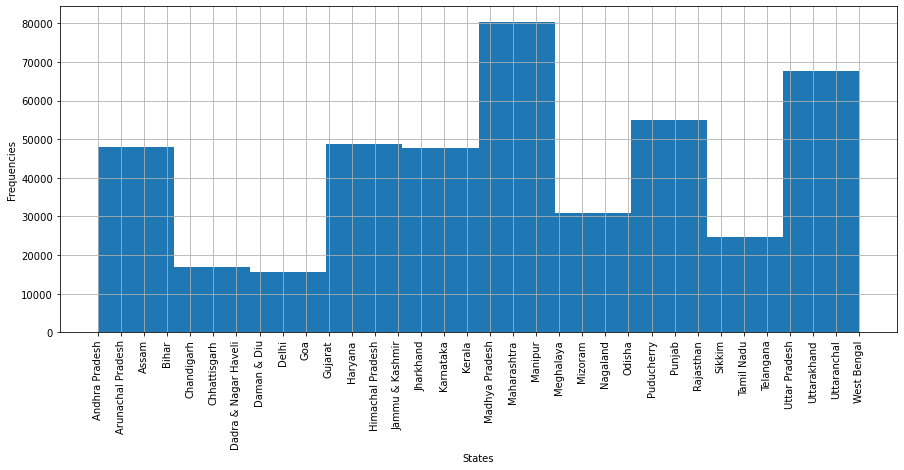

In [19]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
india.state.hist() #histogram
plt.xlabel('States')
plt.ylabel('Frequencies')
plt.plot()

**State Count Summary:**
* **Maximum State Count: Madhya Pradesh, Maharashtra, Manipur**
* **Minimum State Count: Daman & Diu, Delhi, Goa**    

In [20]:
india['type'].value_counts() # viewing the count of values present in the type column

Residential, Rural and other Areas    184404
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

## 5.2 Histogram: TYPE OF AREA Count
**This visualization shows us the count of types present in the dataset**

[]

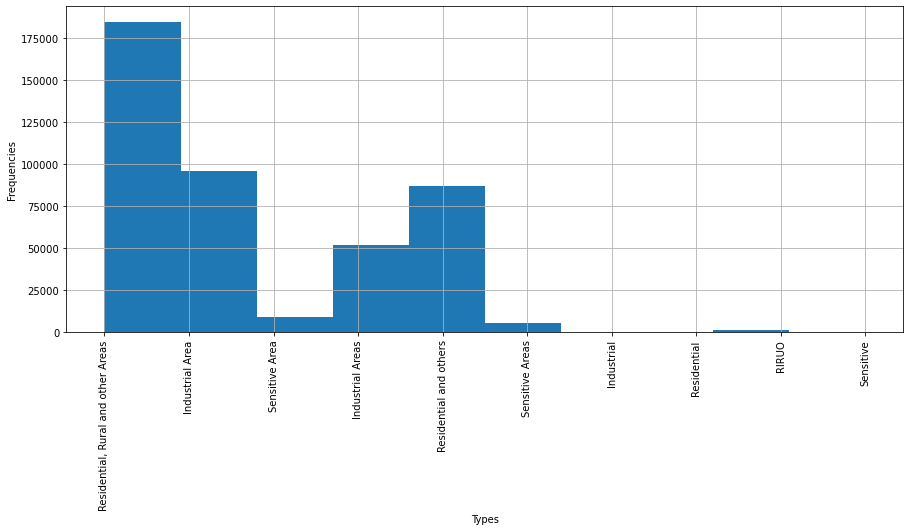

In [21]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
india.type.hist() #histogram
plt.xlabel('Types')
plt.ylabel('Frequencies')
plt.plot()

**Type of Area Summary:**
* **Maximum Type Count: 1.(Residential, Rural and other Areas)**
* **Minimum Type Count: 1.(Industrial),2.(Residential),3.(Sensitive)**    

## 5.3 Bar Plot: SO2 LEVEL (state wise)
* **This visuals shows the name of the state having higher so2 levels in the air which is uttaranchal followed by UK.**
* **We can also use the groupby function to sort values in an ascending order based on x-axis and its keys.**
* **Below we get a clear picture of the states in an increasing order based on their so2 levels.**

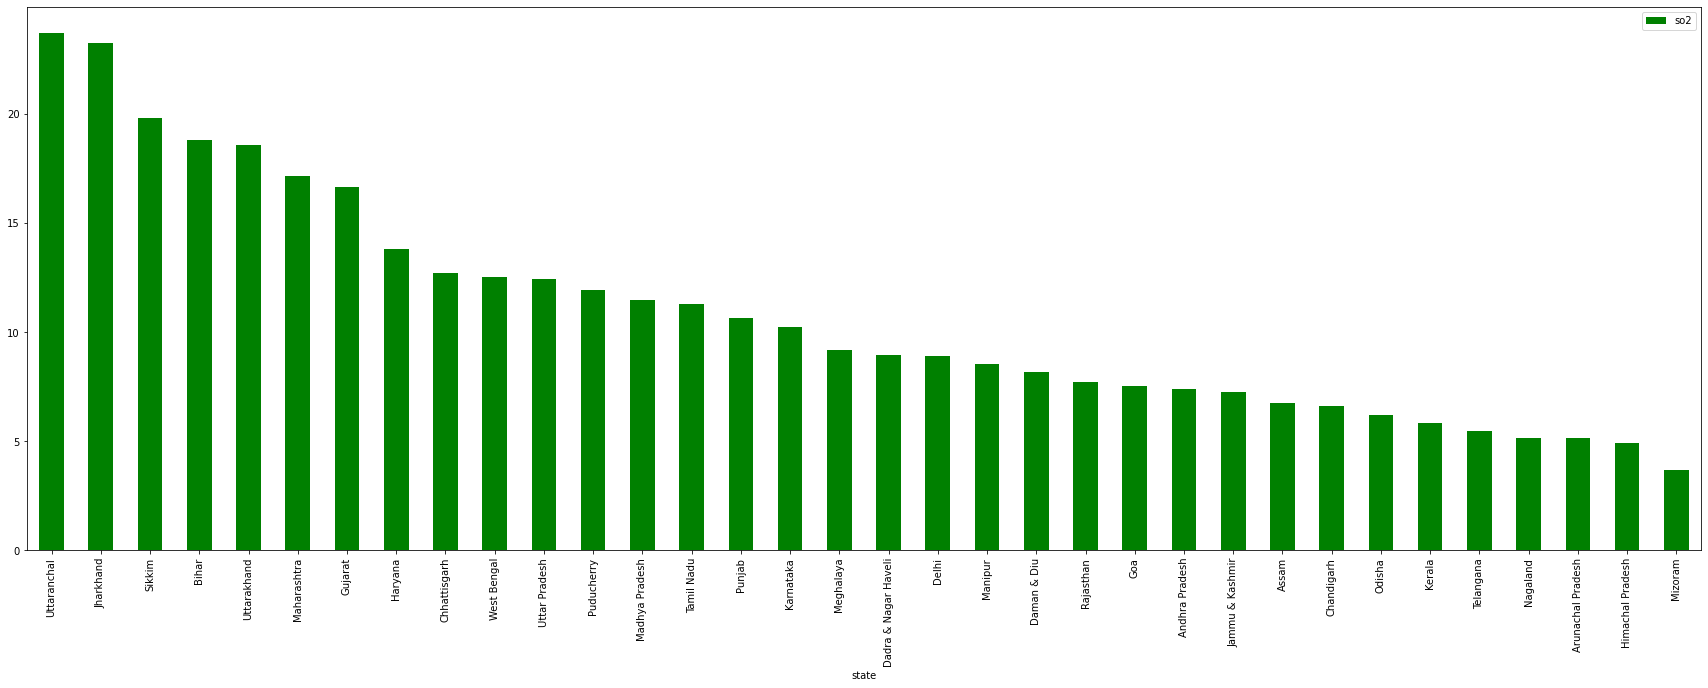

In [24]:
india[['so2','state']].groupby(['state']).mean().sort_values(by='so2',ascending=False).plot.bar(color='green')
plt.rcParams['figure.figsize']=(30,10)
plt.show()

**Sulphur di-oxide Summary:**
* **Maximum SO2 Count: Uttarkhand,Jharkhand**
* **Minimum SO2 Count: Mizoram**    

## 5.4 Bar Plot: NO2 LEVEL (state wise)
* **This visuals shows the name of the state having higher no2 levels in the air which is westbengal followed by delhi.**
* **We can also use the groupby function to sort values in an ascending order based on x-axis and its keys.**
* **Below we get a clear picture of the states in an increasing order based on their no2 levels.**

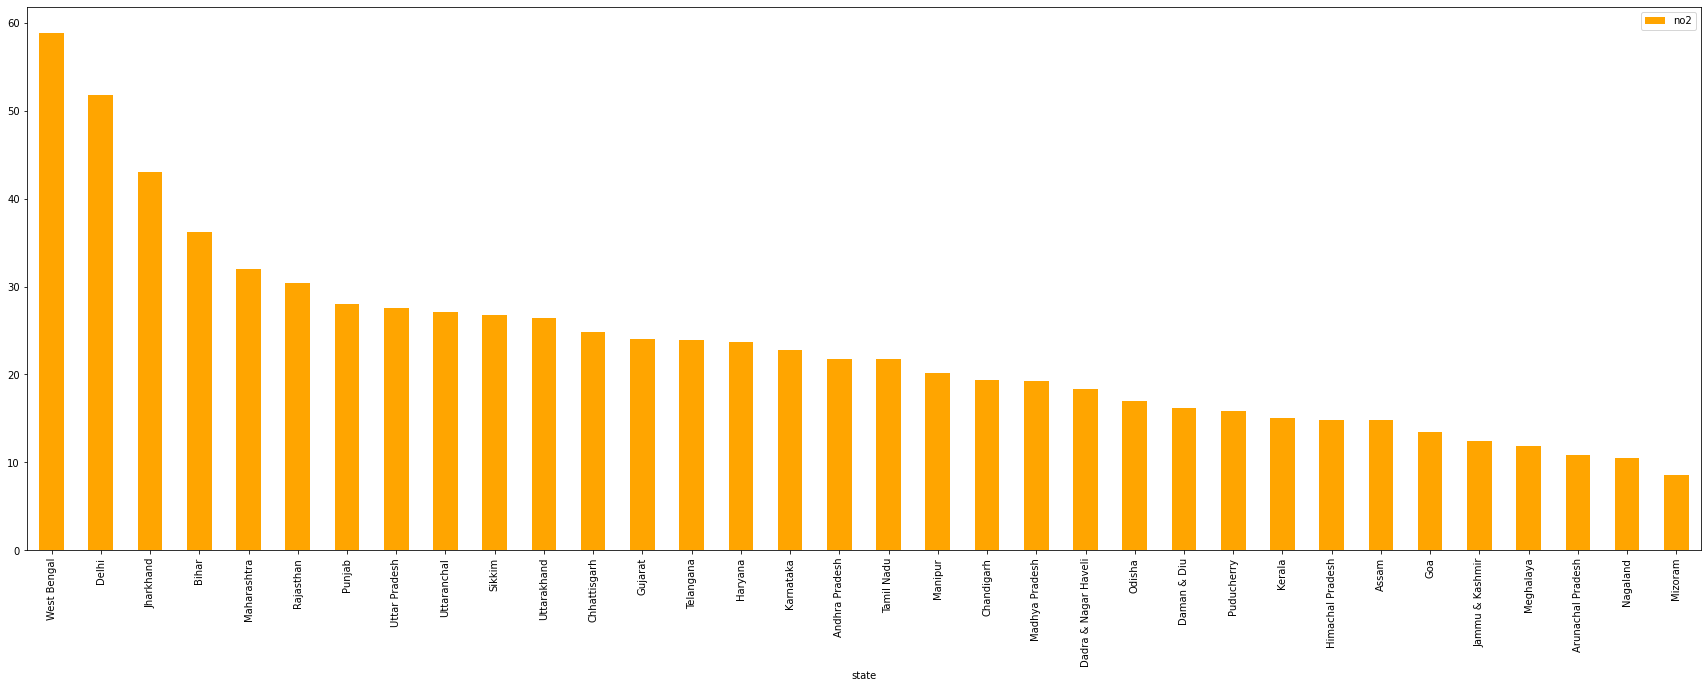

In [25]:
india[['no2','state']].groupby(['state']).mean().sort_values(by='no2',ascending=False).plot.bar(color='orange')
plt.rcParams['figure.figsize']=(30,10)
plt.show()

**Nitrogen di-oxide Summary:**
* **Maximum NO2 Count: West Bengal**
* **Minimum NO2 Count: Mizoram**  

## 5.5 Bar Plot: RSPM LEVEL (state wise)
* **This visuals shows the name of the state having higher rspm levels in the air which is delhi followed by UP.**
* **We can also use the groupby function to sort values in an ascending order based on x-axis and its keys.**
* **Below we get a clear picture of the states in an increasing order based on their rspm levels.**

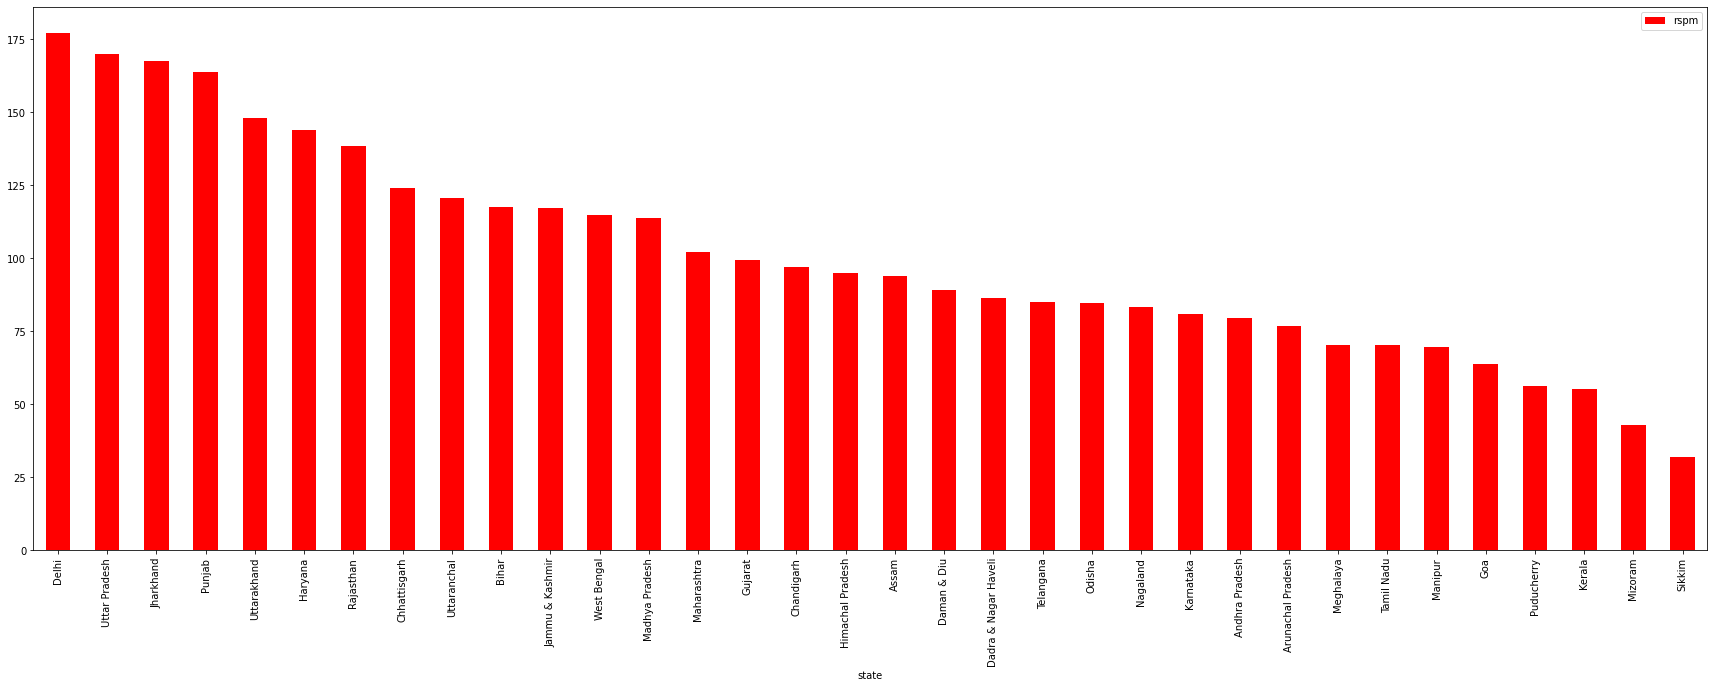

In [26]:
india[['rspm','state']].groupby(['state']).mean().sort_values(by='rspm',ascending=False).plot.bar(color='red')
plt.rcParams['figure.figsize']=(30,10)
plt.show()

**Respirable Suspendend Particulate Matter (RSPM) concentration Summary:**
* **Maximum RSPM Count: Delhi**
* **Minimum RSPM Count: Sikkim**  

## 5.6 Bar Plot: SPM LEVEL (state wise)
* **This visuals shows the name of the state having higher spm levels in the air which is delhi followed by UP.**
* **We can also use the groupby function to sort values in an ascending order based on x-axis and its keys.**
* **Below we get a clear picture of the states in an increasing order based on their spm levels.**

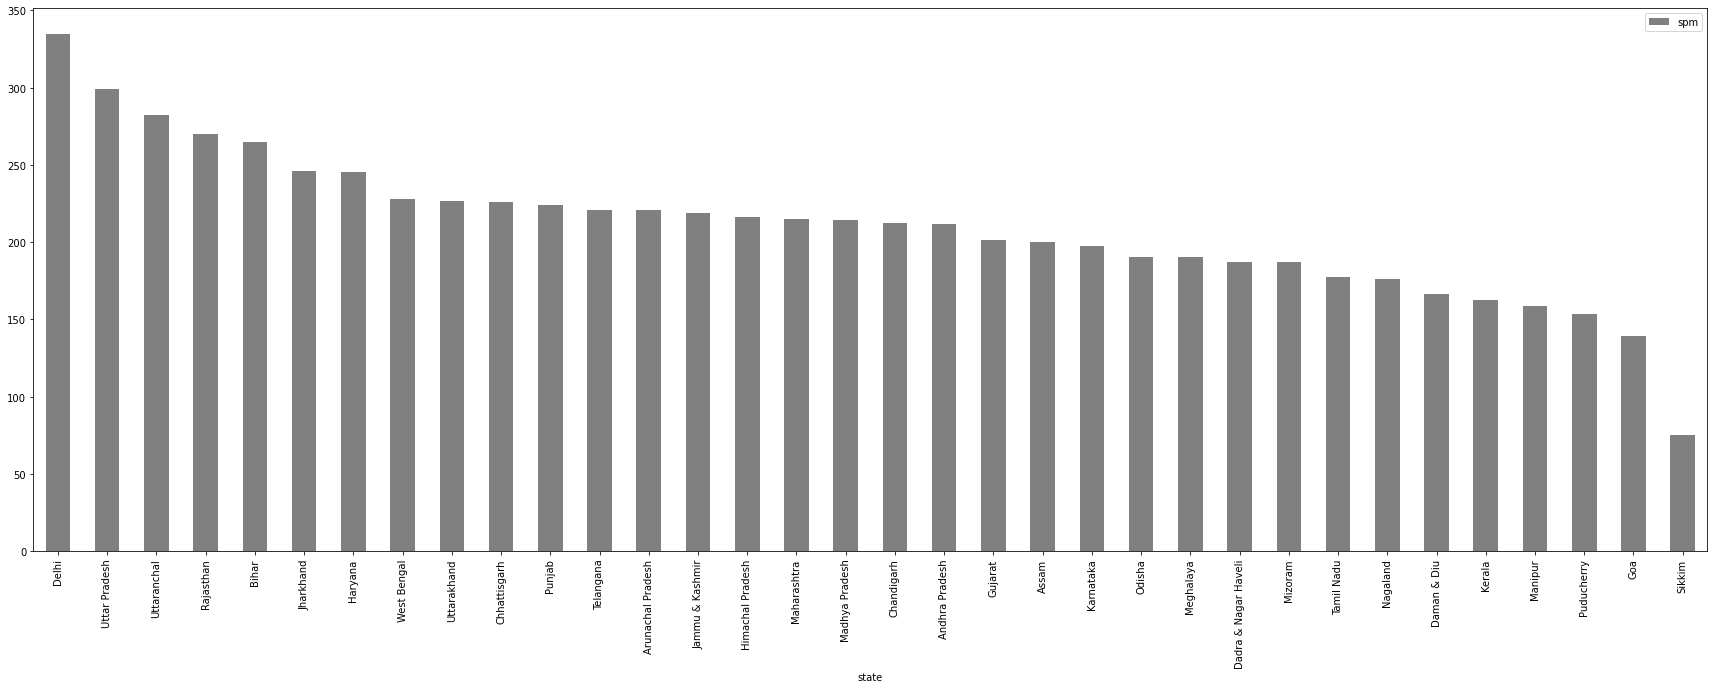

In [27]:
india[['spm','state']].groupby(['state']).mean().sort_values(by='spm',ascending=False).plot.bar(color='grey')
plt.rcParams['figure.figsize']=(30,10)
plt.show()

**Suspended Particulate Matter (SPM) Summary:**
* **Maximum SPM Count: Delhi**
* **Minimum SPM Count: Sikkim**  

# 6. CALCULATE AIR QUALITY INDEX BASED ON FORMULAS
**The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discountinuous jump of one AQI unit. To convert from concentration to AQI this equations are used**

* **Function to calculate so2 individual pollutant index(si)**

In [28]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
        si=so2*(50/40)
    elif (so2>40 and so2<=80):
        si=50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
        si=100+(so2-80)*(100/300)     
    elif (so2>380 and so2<=800):
        si=200+(so2-380)*(100/420)    
    elif (so2>800 and so2<=1600):
        si=300+(so2-800)*(100/800)
    elif (so2>1600):
        si=400+(so2-1600)*(100/800)
    return si
india['SOi']=india['so2'].apply(cal_SOi)
data=india[['so2','SOi']]
data.head()
# calculating the individual pollutant index for so2(sulphur dioxide)

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


* **Function to calculate no2 individual pollutant index(ni)**

In [29]:
def cal_NOi(no2):
    ni=0
    if (no2<=40):
        ni=no2*(50/40)
    elif (no2>40 and no2<=80):
        ni=50+(no2-40)*(50/40)
    elif (no2>80 and no2<=180):
        ni=100+(no2-80)*(100/100)     
    elif (no2>180 and no2<=280):
        ni=200+(no2-180)*(100/100)    
    elif (no2>280 and no2<=400):
        ni=300+(no2-280)*(100/120)
    else:
        ni=400+(no2-400)*(100/120)
    return ni
india['NOi']=india['no2'].apply(cal_NOi)
data=india[['no2','NOi']]
data.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,no2,NOi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


* **Function to calculate rspm individual pollutant index(rpi)**

In [30]:
def cal_RSPMI(rspm):
    rpi=0
    if (rpi<=30):
        rpi=rpi*(50/30)
    elif (rpi>30 and rpi<=60):
        rpi=50+(rpi-30)*(50/30)
    elif (rpi>60 and rpi<=90):
        rpi=100+(rpi-60)*(100/30)     
    elif (rpi>90 and rpi<=120):
        rpi=200+(rpi-90)*(100/30)    
    elif (rpi>120 and rpi<=250):
        rpi=300+(rpi-120)*(100/130)
    else:
        rpi=400+(rpi-250)*(100/130)
    return rpi
india['Rpi']=india['rspm'].apply(cal_RSPMI)
data=india[['rspm','Rpi']]
data.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,rspm,Rpi
0,108.832784,0.0
1,108.832784,0.0
2,108.832784,0.0
3,108.832784,0.0
4,108.832784,0.0


* **Function to calculate spm individual pollutant index(spi)**

In [31]:
def cal_SPMI(spm):
    spi=0
    if (spm<=50):
        spi=spm*(50/50)
    elif (spm>50 and spm<=100):
        spi=50+(spm-50)*(50/50)
    elif (spm>100 and spm<=250):
        spi=100+(spm-100)*(100/150)     
    elif (spm>250 and spm<=350):
        spi=200+(spm-250)*(100/100)    
    elif (spm>350 and spm<=430):
        spi=300+(spm-350)*(100/80)
    else:
        spi=400+(spm-430)*(100/430)
    return spi
india['SPMi']=india['spm'].apply(cal_SPMI)
data=india[['spm','SPMi']]
data.head()
# calculating the individual pollutant index for spm(Suspended Particulate Matter)

,spm,SPMi
0,220.78348,180.52232
1,220.78348,180.52232
2,220.78348,180.52232
3,220.78348,180.52232
4,220.78348,180.52232


* **Function to calculate Air Quality Index(AQI) of every data value**

In [32]:
def cal_aqi(si,ni,rpi,spi):
    aqi=0
    if(si>ni and si>rpi and si>spi):
        aqi=si
    if(ni>si and ni>rpi and ni>spi):
        aqi=ni 
    if(rpi>si and rpi>ni and rpi>spi):
        aqi=rpi
    if(spi>si and spi>ni and spi>rpi):
        aqi=spi
    return aqi

india['AQI']=india.apply(lambda x:cal_aqi(x['SOi'],x['NOi'],x['Rpi'],x['SPMi']),axis=1)
data=india[['state','SOi','NOi','Rpi','SPMi','AQI']]
data.head()
# calculating th air quality index.

,state,SOi,NOi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,180.52232,180.52232
1,Andhra Pradesh,3.875,8.750,0.0,180.52232,180.52232
2,Andhra Pradesh,7.750,35.625,0.0,180.52232,180.52232
3,Andhra Pradesh,7.875,18.375,0.0,180.52232,180.52232
4,Andhra Pradesh,5.875,9.375,0.0,180.52232,180.52232


## **Using thresold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and hazardous**

In [33]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very Unhealthy"
    elif x>400:
        return "Hazardous"
    
india['AQI_Range']=india['AQI'].apply(AQI_Range)    
india.head()

,state,location,type,so2,no2,rspm,spm,SOi,NOi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,108.832784,220.78348,6.000,21.750,0.0,180.52232,180.52232,Poor
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,108.832784,220.78348,3.875,8.750,0.0,180.52232,180.52232,Poor
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,108.832784,220.78348,7.750,35.625,0.0,180.52232,180.52232,Poor
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,108.832784,220.78348,7.875,18.375,0.0,180.52232,180.52232,Poor
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,108.832784,220.78348,5.875,9.375,0.0,180.52232,180.52232,Poor


## **Above dataset is my final dataset and ready to perform some Machine Learning Algorithms**

# 7. OBSERVATIONS



Total number of values and their percentages:
                  Total  Percent(%)
Poor            327022   75.049973
Unhealthy        31733    7.282571
Moderate         30473    6.993407
Hazardous        18700    4.291560
Very Unhealthy   15823    3.631302
Good             11988    2.751188

AQI_Range Graph:


          Poor            Unhealthy           Moderate          Hazardous        Very Unhealthy          Good



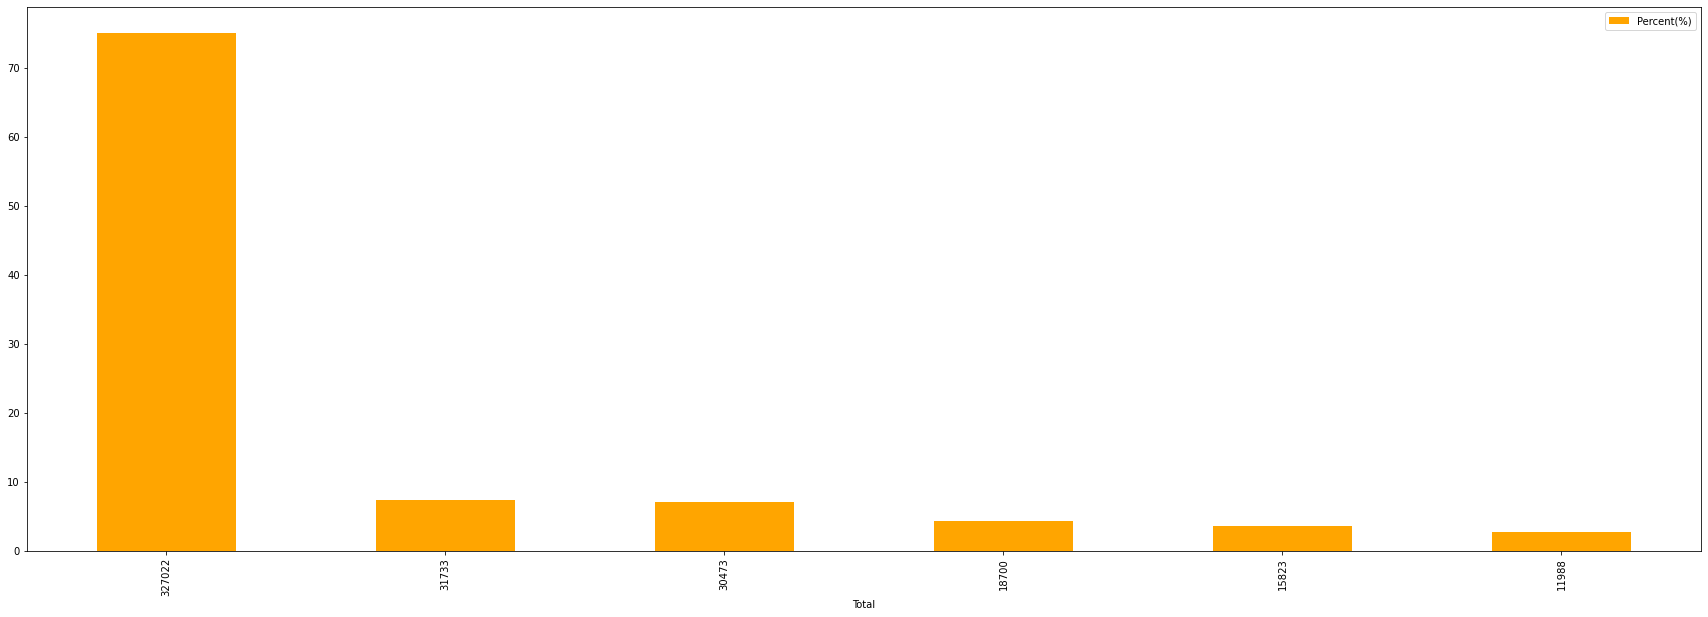


State wise AQI Graph:



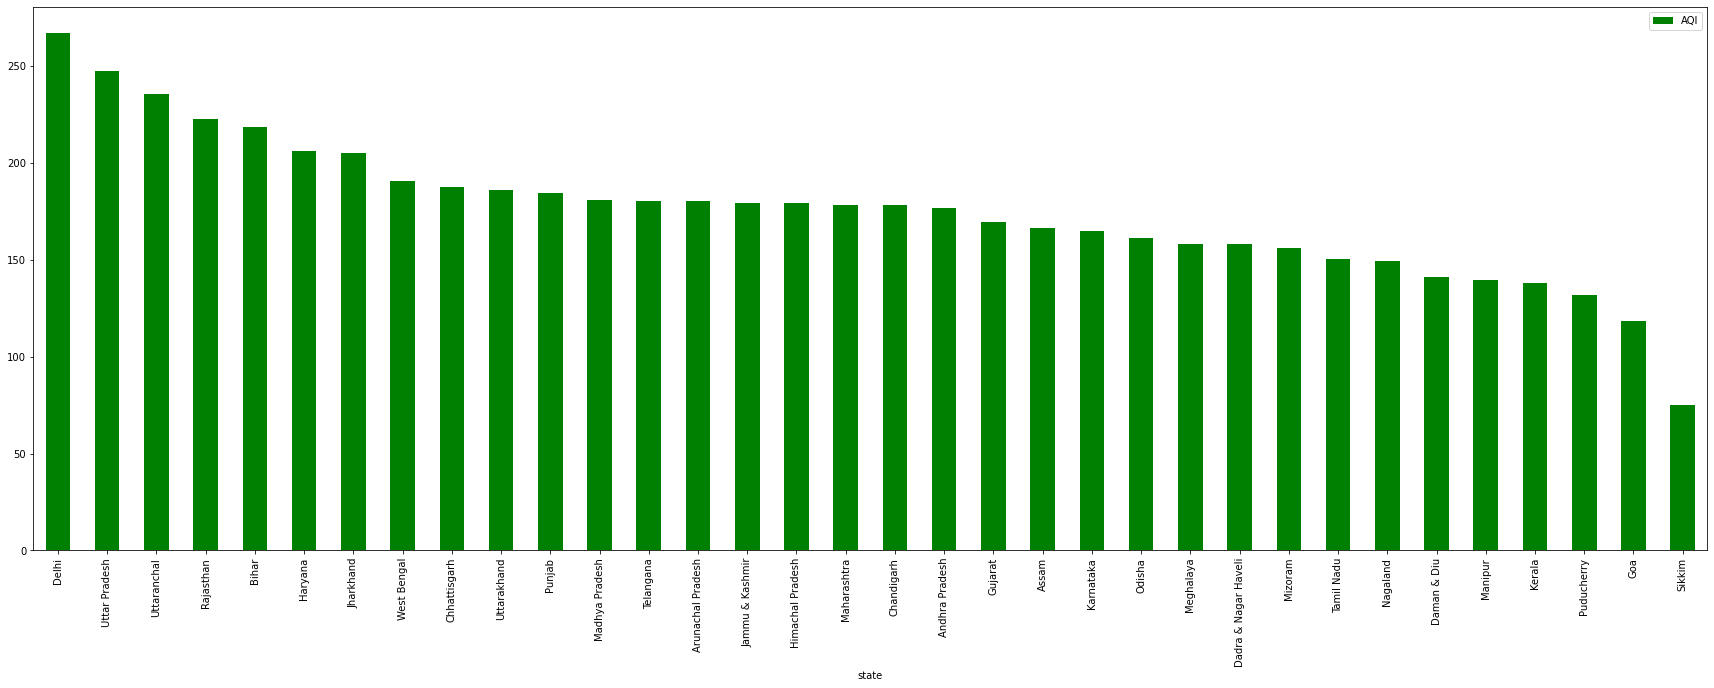


State wise AQI_Range Graph:



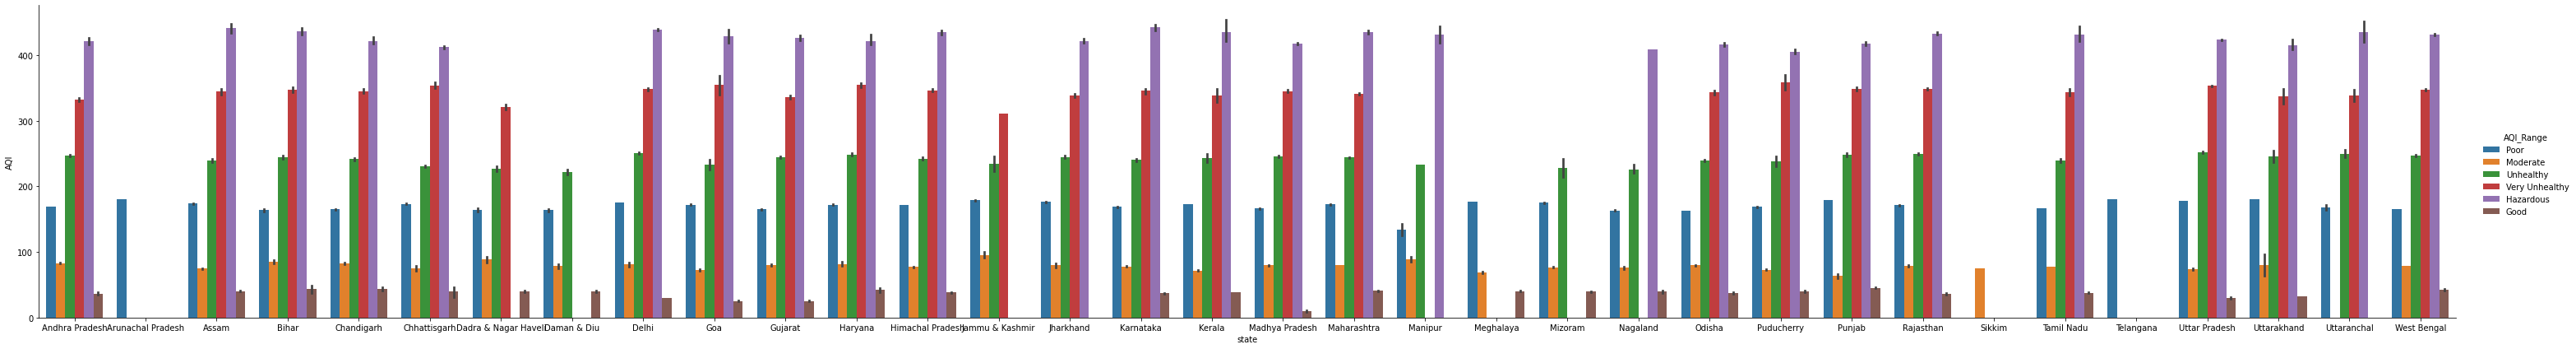

In [34]:
# these are the counts of values present in the AQI_Range column
air_quality_class=india['AQI_Range'].value_counts().sort_values(ascending=False)

percentage = (air_quality_class/air_quality_class.sum()*100).sort_values(ascending=False)
# count(return non-nan values)
data_with_percentage = pd.concat([air_quality_class,percentage], axis=1, keys=['Total','Percent(%)'])
# concatenating total null values and their percentage of missing values for further imputation or column deletion
print("\n\nTotal number of values and their percentages:\n",data_with_percentage)

print("\nAQI_Range Graph:\n")
print("\n          Poor            Unhealthy           Moderate          Hazardous        Very Unhealthy          Good\n")
data_with_percentage.groupby(['Total']).mean().sort_values(by='Percent(%)',ascending=False).plot.bar(color='orange')
plt.rcParams['figure.figsize']=(30,10)
plt.show()

print("\nState wise AQI Graph:\n")
india[['AQI','state']].groupby(['state']).mean().sort_values(by='AQI',ascending=False).plot.bar(color='green')
plt.rcParams['figure.figsize']=(30,10)
plt.show()

print("\nState wise AQI_Range Graph:\n")
import seaborn as sns
sns.catplot(data=india, x="state", y="AQI", hue="AQI_Range", kind="bar",height=6,aspect=7)

**After counting the value of "AQI_Range" we can definitely say that the count of Poor air quality is much higher than the others, that's why the breathable air is very less in our country**
* **Poor Air  is ========== 75.04%**
* **Unhealthy Air is ====== 7.28%**
* **Moderate Air  is ====== 6.99%**
* **Hazardous Air  is ===== 4.29%**
* **Very Unhealthy Air is == 3.63%**
* **Good Air  is ========== 2.75%**

**Most vulnarable state in terms of Air Quality:**
* **Delhi**

**Most safest state in terms of Air Quality:**
* **Sikkim**

**North Indian states are badly effected when we observe their AQI data but the north-eastern and south-indian states are performing well in AQI data.**

#                         7. MACHINE LEARNING ALGORITHMS
**Performing this in 2 parts, first is regression techniques based on "AQI" and second is classification techniques based on "AQI_Range"**

## 7.1 Regression Algorithms

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

## Splitting the dataset into Dependent and Independent columns

In [36]:
x=india[['so2','no2','rspm','spm']]
y=india['AQI']

In [37]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=70)

## (a) Linear Regression 

In [38]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [39]:
# predicting train data
train_pred=model.predict(x_train)
#predicting on test data
test_pred=model.predict(x_test)

In [40]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred)))
print("RMSE of Train Data     : ",str(RMSE_train))
print("RMSE of Test Data      : ",str(RMSE_test))
print("="*50)
print("RSquared Value on Train: ",model.score(x_train,y_train))
print("RSquared Value on Test : ",model.score(x_test,y_test))

RMSE of Train Data     :  17.475575111731764
RMSE of Test Data      :  16.81854826059762
RSquared Value on Train:  0.9479550380989742
RSquared Value on Test :  0.9514775730079252


## (b) Decision Tree Regressor

In [41]:
DT=DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [42]:
# predicting train data
train_pred1=DT.predict(x_train)
#predicting on test data
test_pred1=DT.predict(x_test)

In [43]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred1)))
print("RMSE of Train Data     : ",str(RMSE_train))
print("RMSE of Test Data      : ",str(RMSE_test))
print("="*50)
print("RSquared Value on Train: ",DT.score(x_train,y_train))
print("RSquared Value on Test : ",DT.score(x_test,y_test))

RMSE of Train Data     :  8.87737142408341e-12
RMSE of Test Data      :  0.7970000024436215
RSquared Value on Train:  1.0
RSquared Value on Test :  0.9998910362228819


## (c) Random Forest Regressor

In [44]:
RF=RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

In [45]:
# predicting train data
train_pred2=RF.predict(x_train)
#predicting on test data
test_pred2=RF.predict(x_test)

In [46]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(y_train,train_pred2)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(y_test,test_pred2)))
print("RMSE of Train Data     : ",str(RMSE_train))
print("RMSE of Test Data      : ",str(RMSE_test))
print("="*50)
print("RSquared Value on Train: ",RF.score(x_train,y_train))
print("RSquared Value on Test : ",RF.score(x_test,y_test))

RMSE of Train Data     :  0.36419008724387375
RMSE of Test Data      :  0.7375444496303024
RSquared Value on Train:  0.9999773966930733
RSquared Value on Test :  0.999906687053766


## 7.1.1. Choosing Best Regression Model
* **Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response.**
* **In general, the higher the R-squared value, the better the model fits your data.**
* **Here, after comparing all the above three models, I found Random Forest Classifier has the lowest RMSE values and highest RSquared values for both test and trained data, therefore I will choose this model from here**

## 7.2 Classification Algorithm

**The above three algorithms I performed, they are based on "AQI" which have numerical values now I want to run more algorithms based on "AQI_Range" and for that I am going to use Classification Algorithms**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

## Splitting the dataset into Dependent and Independent columns

In [48]:
x1=india[['so2','no2','rspm','spm']]
y1=india['AQI_Range']

In [49]:
x_train, x_test, y_train, y_test= train_test_split(x1,y1,test_size=0.3,random_state=70)

## (a) Logistic Regression

In [50]:
LogReg = LogisticRegression()
LogReg.fit(x_train, y_train)

LogisticRegression()

In [51]:
# predicting train data
train_pred3=LogReg.predict(x_train)
#predicting on test data
test_pred3=LogReg.predict(x_test)

In [52]:
print("Model Accuracy on Train Data:",accuracy_score(y_train,train_pred3))
print("Model Accuracy on Test Data :",accuracy_score(y_test,test_pred3))
print("="*50)
print("KappaScore                  :",metrics.cohen_kappa_score(y_test,test_pred3)) 
#kappa Score is a evaluation metrics that tell us how well are models performing

Model Accuracy on Train Data: 0.7518695679257221
Model Accuracy on Test Data : 0.7525129664478818
KappaScore                  : 0.10918634681193362


## (b) Decision Tree Classifier

In [53]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
# predicting train data
train_pred4=DTC.predict(x_train)
#predicting on test data
test_pred4=DTC.predict(x_test)

In [55]:
print("Model Accuracy on Train Data:",accuracy_score(y_train,train_pred4))
print("Model Accuracy on Test Data :",accuracy_score(y_test,test_pred4))
print("="*50)
print("KappaScore                  :",metrics.cohen_kappa_score(y_test,test_pred4)) 
#kappa Score is a evaluation metrics that tell us how well are models performing

Model Accuracy on Train Data: 1.0
Model Accuracy on Test Data : 0.9999464512476859
KappaScore                  : 0.9998730290489354


## (c) Random Forest Classifier

In [56]:
RFC=RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [57]:
# predicting train data
train_pred5=RFC.predict(x_train)
#predicting on test data
test_pred5=RFC.predict(x_test)

In [58]:
print("Model Accuracy on Train Data:",accuracy_score(y_train,train_pred5))
print("Model Accuracy on Test Data :",accuracy_score(y_test,test_pred5))
print("="*50)
print("KappaScore                  :",metrics.cohen_kappa_score(y_test,test_pred5)) 
#kappa Score is a evaluation metrics that tell us how well are models performing

Model Accuracy on Train Data: 1.0
Model Accuracy on Test Data : 0.9999235017824085
KappaScore                  : 0.9998186127243149


## (d) K-Nearest Neighbors

In [59]:
KNN=KNeighborsClassifier().fit(x_train, y_train)

In [60]:
# predicting train data
train_pred6=KNN.predict(x_train)
#predicting on test data
test_pred6=KNN.predict(x_test)

In [61]:
print("Model Accuracy on Train Data:",accuracy_score(y_train,train_pred6))
print("Model Accuracy on Test Data :",accuracy_score(y_test,test_pred6))
print("="*50)
print("KappaScore                  :",metrics.cohen_kappa_score(y_test,test_pred6)) 
#kappa Score is a evaluation metrics that tell us how well are models performing

Model Accuracy on Train Data: 0.9977345525003525
Model Accuracy on Test Data : 0.9955860528449687
KappaScore                  : 0.9895314163350402


## 7.2.1. Choosing Best Classification Model
* **The kappa score is an interesting metric. Its origins are in the field of psychology: it is used for measuring the agreement between two human evaluators or raters (e.g., psychologists) when rating subjects (patients). It was later “appropriated” by the machine-learning community to measure classification performance.**
* **Cohen suggested the Kappa result be interpreted as follows: values ≤ 0 as indicating no agreement and 0.01–0.20 as none to slight, 0.21–0.40 as fair, 0.41– 0.60 as moderate, 0.61–0.80 as substantial, and 0.81–1.00 as almost perfect agreement.**
* **Here, after comparing all the above four models, I found except Logistic Regression, other three models are performing great but I will choose Decision Tree Classifier as it is giving me slightly better result.**

# 7.3 PREDICTIONS: AIR QUALITY 

**Now I can make predictions by taking data of any area or place.**
**Here I've collected the neccessary air data of my hometown durgapur which is situated in Paschim Bardhamaan district and also an industrial area.**

**Current Air Data of Durgapur:**
* **so2 :3**
* **no2 :11**
* **rspm:97**
* **spm :10**

**Now let's check what my prediction says...**

In [68]:
s=float(input("Sulphur Dixoide (SO2)                          : "))
n=float(input("Nitrogen Dixoide (NO2)                         : "))
r=float(input("Respirable Suspendend Particulate Matter (RSPM): "))
spm=float(input("Suspended Particulate Matter (SPM)             : "))
print("="*50)
print("Air Quality Index     : ",RF.predict([[s,n,r,spm]]))
print("Air Quality           : ",DTC.predict([[s,n,r,spm]]))

Sulphur Dixoide (SO2)                          : 3
Nitrogen Dixoide (NO2)                         : 11
Respirable Suspendend Particulate Matter (RSPM): 97
Suspended Particulate Matter (SPM)             : 10
Air Quality Index     :  [13.81]
Air Quality           :  ['Good']


**Therefore, My hometown's Air Quality Index is quite good as per the current data of March 2023**

# That's all about my Air Qulaity Analysis of India.
**Thank you!**